# Section 7: Basic Artificial Neural Networks - ANNs

## 40-42. Keras Syntax Basic

### Choosing an optimizer and loss 

Keep in mind what kind of problem we are tying to solove:

        # For a multi-class classification problem
        model.compile(optimizer='rmsprop',
                      loss = 'categorical_crossentropy',
                      metrics=['accuracy'])
        
        # For a binary classification problem
        model.compile(optimizer='rmsprop',
                      loss = 'binary_crossentropy',
                      metrics=['accuracy'])
        
        # For a mean squared error regresssion problem
        model.compile(optimizer='rmsprop',
                      loss='mse')
        


### Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* ***Batch***: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* ***Epoch***: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

**Part One**: Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('TF_2_Notebooks_and_Data/DATA/fake_reg.csv')

In [5]:
# Regression problem - price is up to feature1 and feature2
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


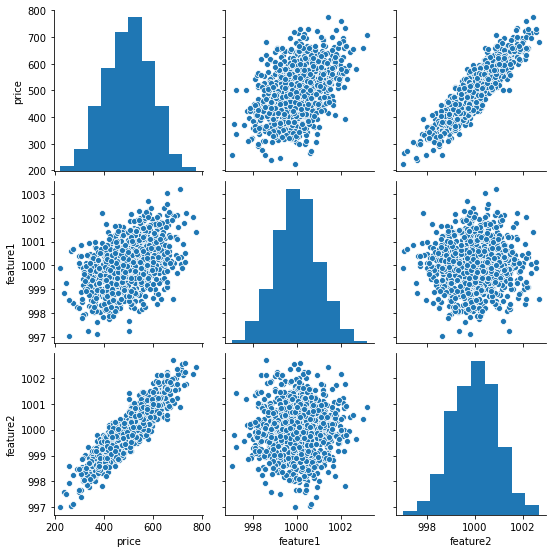

In [6]:
# Create a pair plot of the dataframe to check correlation 
sns.pairplot(df)

In [7]:
# Create a test train split 
from sklearn.model_selection import train_test_split

In [8]:
X = df[['feature1','feature2']].values
# We need pass in numpy array instead of data frames using .values

In [9]:
y = df['price'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_test.shape # 30% of our data are in test set 

(300, 2)

In [14]:
# It is important to scale our data
from sklearn.preprocessing import MinMaxScaler

In [15]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to False to perfor

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train) # only fit train data to prevent data leakage 

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

**Part Two**: Creating and Training the Model 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [27]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 594us/step - loss: 256695.1250
Epoch 2/250
22/22 [==============================] - 0s 571us/step - loss: 256644.6562
Epoch 3/250
22/22 [==============================] - 0s 552us/step - loss: 256595.0625
Epoch 4/250
22/22 [==============================] - 0s 514us/step - loss: 256531.8438
Epoch 5/250
22/22 [==============================] - 0s 520us/step - loss: 256457.9844
Epoch 6/250
22/22 [==============================] - 0s 523us/step - loss: 256371.5156
Epoch 7/250
22/22 [==============================] - 0s 469us/step - loss: 256187.3125
Epoch 8/250
22/22 [==============================] - 0s 435us/step - loss: 255791.3594
Epoch 9/250
22/22 [==============================] - 0s 453us/step - loss: 255347.4062
Epoch 10/250
22/22 [==============================] - 0s 495us/step - loss: 254862.5156
Epoch 11/250
22/22 [==============================] - 0s 445us/step - loss: 254320.4531
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 463us/step - loss: 1209.3037
Epoch 95/250
22/22 [==============================] - 0s 418us/step - loss: 1181.6187
Epoch 96/250
22/22 [==============================] - 0s 448us/step - loss: 1150.7860
Epoch 97/250
22/22 [==============================] - 0s 474us/step - loss: 1121.2911
Epoch 98/250
22/22 [==============================] - 0s 435us/step - loss: 1089.6737
Epoch 99/250
22/22 [==============================] - 0s 420us/step - loss: 1061.3732
Epoch 100/250
22/22 [==============================] - 0s 472us/step - loss: 1033.8546
Epoch 101/250
22/22 [==============================] - 0s 442us/step - loss: 1000.2832
Epoch 102/250
22/22 [==============================] - 0s 426us/step - loss: 973.6194
Epoch 103/250
22/22 [==============================] - 0s 470us/step - loss: 942.6290
Epoch 104/250
22/22 [==============================] - 0s 457us/step - loss: 909.3488
Epoch 105/250
22/22 [==============================] - 0s 426us/s

22/22 [==============================] - 0s 434us/step - loss: 24.9872
Epoch 190/250
22/22 [==============================] - 0s 490us/step - loss: 24.2137
Epoch 191/250
22/22 [==============================] - 0s 468us/step - loss: 24.4762
Epoch 192/250
22/22 [==============================] - 0s 417us/step - loss: 24.3404
Epoch 193/250
22/22 [==============================] - 0s 462us/step - loss: 24.6129
Epoch 194/250
22/22 [==============================] - 0s 474us/step - loss: 24.0027
Epoch 195/250
22/22 [==============================] - 0s 431us/step - loss: 24.6073
Epoch 196/250
22/22 [==============================] - 0s 465us/step - loss: 24.4666
Epoch 197/250
22/22 [==============================] - 0s 464us/step - loss: 24.1094
Epoch 198/250
22/22 [==============================] - 0s 425us/step - loss: 24.3736
Epoch 199/250
22/22 [==============================] - 0s 425us/step - loss: 24.5545
Epoch 200/250
22/22 [==============================] - 0s 501us/step - loss: 24

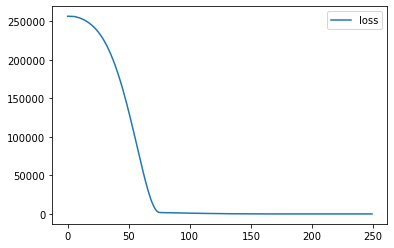

In [28]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

**Part Three**: Model Evaluation 

In [29]:
# Model loss on test sets 
model.evaluate(X_test,y_test,verbose=0)

24.934871673583984

In [30]:
model.evaluate(X_train,y_train, verbose=0)

23.925804138183594

In [32]:
test_predictions = model.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(300,))

In [34]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [38]:
pred_df.columns=['Test True Y','Model Predictions']
pred_df

,Test True Y,Model Predictions
0,402.296319,405.163818
1,624.156198,623.426270
2,582.455066,592.015442
3,578.588606,572.112549
4,371.224104,366.493591
...,...,...
295,525.704657,528.928467
296,502.909473,515.220276
297,612.727910,609.536926
298,417.569725,416.827393


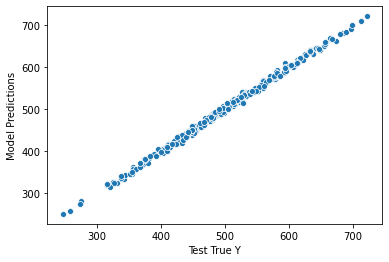

In [39]:
sns.scatterplot(x='Test True Y', y ='Model Predictions', data=pred_df)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

3.998426411139252

In [43]:
# New prediction 
new_gem = [[998,1000]]

new_gem = scaler.transform(new_gem)

In [44]:
model.predict(new_gem)

array([[419.56635]], dtype=float32)

In [45]:
# Save our model in h5 format 
from tensorflow.keras.models import load_model

In [46]:
model.save('my_gem_model.h5')

# 43. Keras Regression 

## The Data
#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### Step 1. Exploratory Data Analysis 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [49]:
df = pd.read_csv('TF_2_Notebooks_and_Data/DATA/kc_house_data.csv')

In [51]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [53]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


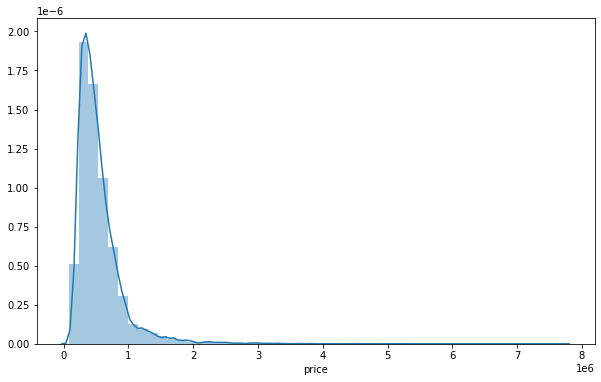

In [56]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

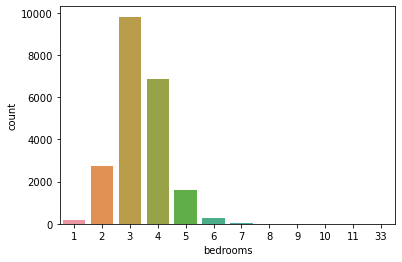

In [57]:
sns.countplot(df['bedrooms'])

In [82]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

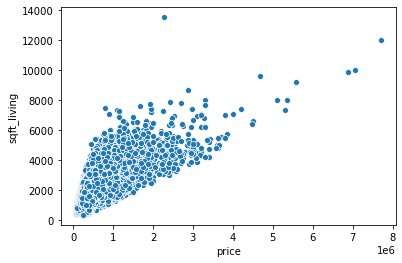

In [83]:
sns.scatterplot(x='price',y='sqft_living', data=df)